In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import log_loss as sk_log_loss
from sklearn.metrics import accuracy_score

## Deep Learning Functions

In [16]:
def initialization(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W, b)

def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def log_loss(A, y):
    # theory :
    # return 1 / len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))
    # but works with :
    return sk_log_loss(y, A)

def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A-y)
    db = 1 / len(y) * np.sum(A-y)
    return (dW, db)

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W, b)

## Neural Network

In [17]:
def artificial_neuron_training(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    W, b = initialization(X_train)
    
    train_loss = []
    train_acc = []
    
    test_loss = []
    test_acc = []
    
    # Training
    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)
        
        if i%10 == 0:
            # loss
            train_loss.append(log_loss(A, y_train))
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            
            # precision
            y_pred = model(X_train, W, b) >= 0.5
            train_acc.append(accuracy_score(y_train, y_pred))
            y_pred = model(X_test, W, b) >= 0.5
            test_acc.append(accuracy_score(y_test, y_pred))
        
        # weights update
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)
    
    # plots
    plt.subplot(1,2,1)
    plt.plot(train_loss, label="train loss")
    plt.plot(test_loss, label="test loss")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(train_acc, label="train acc")
    plt.plot(test_acc, label="test acc")
    plt.legend()
    
    plt.show()
    
    return (W, b)

## Prepare data

Train set :
(1000, 64, 64)  <=> 1000 images of 64x64 px
(1000, 1)  <=> 0 = cat, 1 = dog
(array([0., 1.]), array([500, 500]))  <=> 500 cats and 500 dogs

Test set :
X_test: (200, 64, 64) <=> 200 images of 64x64 px
y_test (200, 1)  <=> 0 = cat, 1 = dog
(array([0., 1.]), array([100, 100]))  <=> 100 cats and 100 dogs


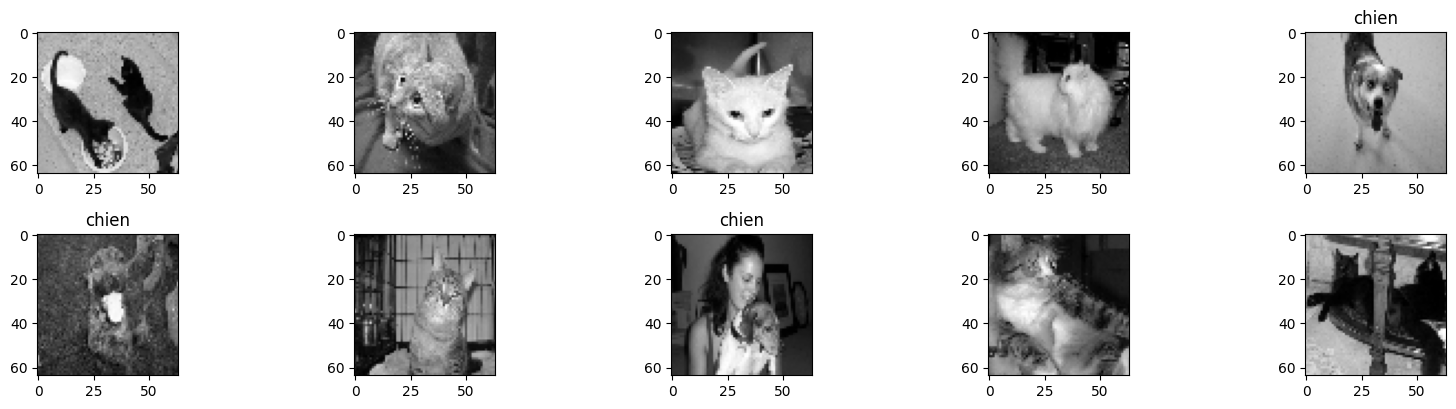

In [18]:
def load_data():
    train_dataset = h5py.File("res/06_trainset.hdf5", "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File("res/06_testset.hdf5", "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data()

print("Train set :")
print(X_train.shape, " <=> 1000 images of 64x64 px")
print(y_train.shape, " <=> 0 = cat, 1 = dog")
print(np.unique(y_train, return_counts=True), " <=> 500 cats and 500 dogs")

print("\nTest set :")
print("X_test:", X_test.shape, "<=> 200 images of 64x64 px")
print("y_test", y_test.shape, " <=> 0 = cat, 1 = dog")
print(np.unique(y_test, return_counts=True), " <=> 100 cats and 100 dogs")

# plot first 10 images
plt.figure(figsize=(16, 8))
for i in np.arange(10):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i], cmap="gray")
    if y_train[i]:
         plt.title(("chien"))
    plt.tight_layout()
plt.show()

## Training

X_train: max = 254, shape = (1000, 64, 64)
X_train: max = 1.0, shape = (1000, 4096)
1000


100%|██████████| 10000/10000 [00:33<00:00, 297.53it/s]


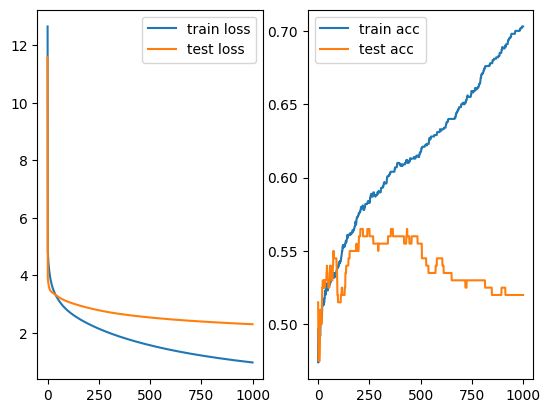

In [19]:
# Flattening and normalization
X_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
# must divide by X_train.max() and not X_test.max() here

print(f"X_train: max = {X_train.max()}, shape = {X_train.shape}")
print(f"X_train: max = {X_reshape.max()}, shape = {X_reshape.shape}")

# Training
print(X_reshape.shape[0])
W, b = artificial_neuron_training(X_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=10000)

## Test Neural Network

In [20]:
y_verif = model(X_reshape, W, b) >= 0.5
print(f"Precision for training values: {accuracy_score(y_train, y_verif)*100}%")

y_pred = model(X_test_reshape, W, b) >= 0.5
print(f"Precision for test values: {accuracy_score(y_test, y_pred)*100}%")

Precision for training values: 70.3%
Precision for test values: 52.0%
